In [7]:
import warnings
import pandas as pd
from models import (
    ModelEvaluator,
    LinearRegressionModel, LogisticRegressionModel, RandomForestClassifierModel, SVCModel,
    LassoModel, RidgeModel, ElasticNetModel, ElasticNetCVModel, SVRModel, LinearSVCModel,
    DecisionTreeClassifierModel, ExtraTreeClassifierModel, KNeighborsClassifierModel,
    GradientBoostingClassifierModel, KMeansModel, GaussianMixtureModel,
    # These don't work at the moment:
    # DenseModel, RNNModel, LSTMModel, GRUModel
)

df = pd.DataFrame(columns=['LinearRegression', 'LogisticRegressionModel', 'RandomForestClassifierModel', 
                          'SVCModel', 'LassoModel', 'RidgeModel', 'ElasticNetModel', 'ElasticNetCVModel', 'SVRModel', 'LinearSVCModel',
          'DecisionTreeClassifierModel', 'ExtraTreeClassifierModel', 'KNeighborsClassifierModel',
          'GradientBoostingClassifierModel', 'KMeansModel', 'GaussianMixtureModel'])

In [8]:
import pandas as pd

column_names = ['LinearRegression', 'LogisticRegressionModel', 'RandomForestClassifierModel', 
                          'SVCModel', 'LassoModel', 'RidgeModel', 'ElasticNetModel', 'ElasticNetCVModel', 'SVRModel', 'LinearSVCModel',
          'DecisionTreeClassifierModel', 'ExtraTreeClassifierModel', 'KNeighborsClassifierModel',
          'GradientBoostingClassifierModel', 'KMeansModel', 'GaussianMixtureModel']

df = pd.DataFrame(columns=column_names)

In [9]:
df.head()

,LinearRegression,LogisticRegressionModel,RandomForestClassifierModel,SVCModel,LassoModel,RidgeModel,ElasticNetModel,ElasticNetCVModel,SVRModel,LinearSVCModel,DecisionTreeClassifierModel,ExtraTreeClassifierModel,KNeighborsClassifierModel,GradientBoostingClassifierModel,KMeansModel,GaussianMixtureModel


In [11]:
import os

directory = '../feature_extraction/'

file_names = [os.path.join(f) for f in os.listdir(directory) 
              if (os.path.isfile(os.path.join(directory, f)) and ('.csv' in f))
             ]


file_paths = [os.path.join(directory, f) for f in os.listdir(directory) 
              if (os.path.isfile(os.path.join(directory, f)) and ('.csv' in f))
             ]

print(file_names)

['dataOrig.csv', 'dataForMFCCDeltas.csv', 'dataForHarmonicAudio.csv']


In [12]:
for i, currFilePath in enumerate(file_paths):
    data = pd.read_csv(currFilePath,usecols=lambda column: column != 'filename')

    X = data.iloc[:, :-1]  # the last column is the label
    y = data.iloc[:, -1]  # the label

    warnings.filterwarnings("ignore")

    me = ModelEvaluator(models=[
        LinearRegressionModel, LogisticRegressionModel, RandomForestClassifierModel, SVCModel,
        LassoModel, RidgeModel, ElasticNetModel, ElasticNetCVModel, SVRModel, LinearSVCModel,
        DecisionTreeClassifierModel, ExtraTreeClassifierModel, KNeighborsClassifierModel,
        GradientBoostingClassifierModel, KMeansModel, GaussianMixtureModel,
    ], X=X, y=y, test_size=0.3, random_state=50)
    me.evaluate_models()
    results = me.results
    
    accuracy_scores = [result['accuracy'] for model, result in zip(me.models, results) 
                   if ('StandardScaler' in result['model'])]

    df.loc[file_names[i]] = accuracy_scores

In [13]:
df.index = df.index.str.replace('.csv', '')
df.head()

,LinearRegression,LogisticRegressionModel,RandomForestClassifierModel,SVCModel,LassoModel,RidgeModel,ElasticNetModel,ElasticNetCVModel,SVRModel,LinearSVCModel,DecisionTreeClassifierModel,ExtraTreeClassifierModel,KNeighborsClassifierModel,GradientBoostingClassifierModel,KMeansModel,GaussianMixtureModel
dataOrig,0.117,0.718,0.886,0.782,0.048,0.117,0.031,0.075,0.298,0.709,0.842,0.812,0.683,0.881,0.096,0.1
dataForMFCCDeltas,0.098,0.184,0.758,0.525,0.100,0.098,0.100,0.100,0.207,0.189,0.749,0.745,0.320,0.750,0.098,0.1
dataForHarmonicAudio,0.110,0.722,0.883,0.787,0.030,0.111,0.025,0.060,0.295,0.706,0.838,0.813,0.672,0.879,0.188,0.1


In [57]:
#csv_file_path = 'allDataOrigFiles_accuracies.csv'

#df.to_csv(csv_file_path, index=False)

In [14]:
df.shape

(3, 16)

In [15]:
columns_to_keep = ['RandomForestClassifierModel', 'SVRModel', 'DecisionTreeClassifierModel', 'ExtraTreeClassifierModel', 'KNeighborsClassifierModel', 'GradientBoostingClassifierModel']
#these models are the only models from the entire list that are ideal for categorical data classification

df_categorical_models_only = df[columns_to_keep]
df_categorical_models_only.head()

,RandomForestClassifierModel,SVRModel,DecisionTreeClassifierModel,ExtraTreeClassifierModel,KNeighborsClassifierModel,GradientBoostingClassifierModel
dataOrig,0.886,0.298,0.842,0.812,0.683,0.881
dataForMFCCDeltas,0.758,0.207,0.749,0.745,0.320,0.750
dataForHarmonicAudio,0.883,0.295,0.838,0.813,0.672,0.879


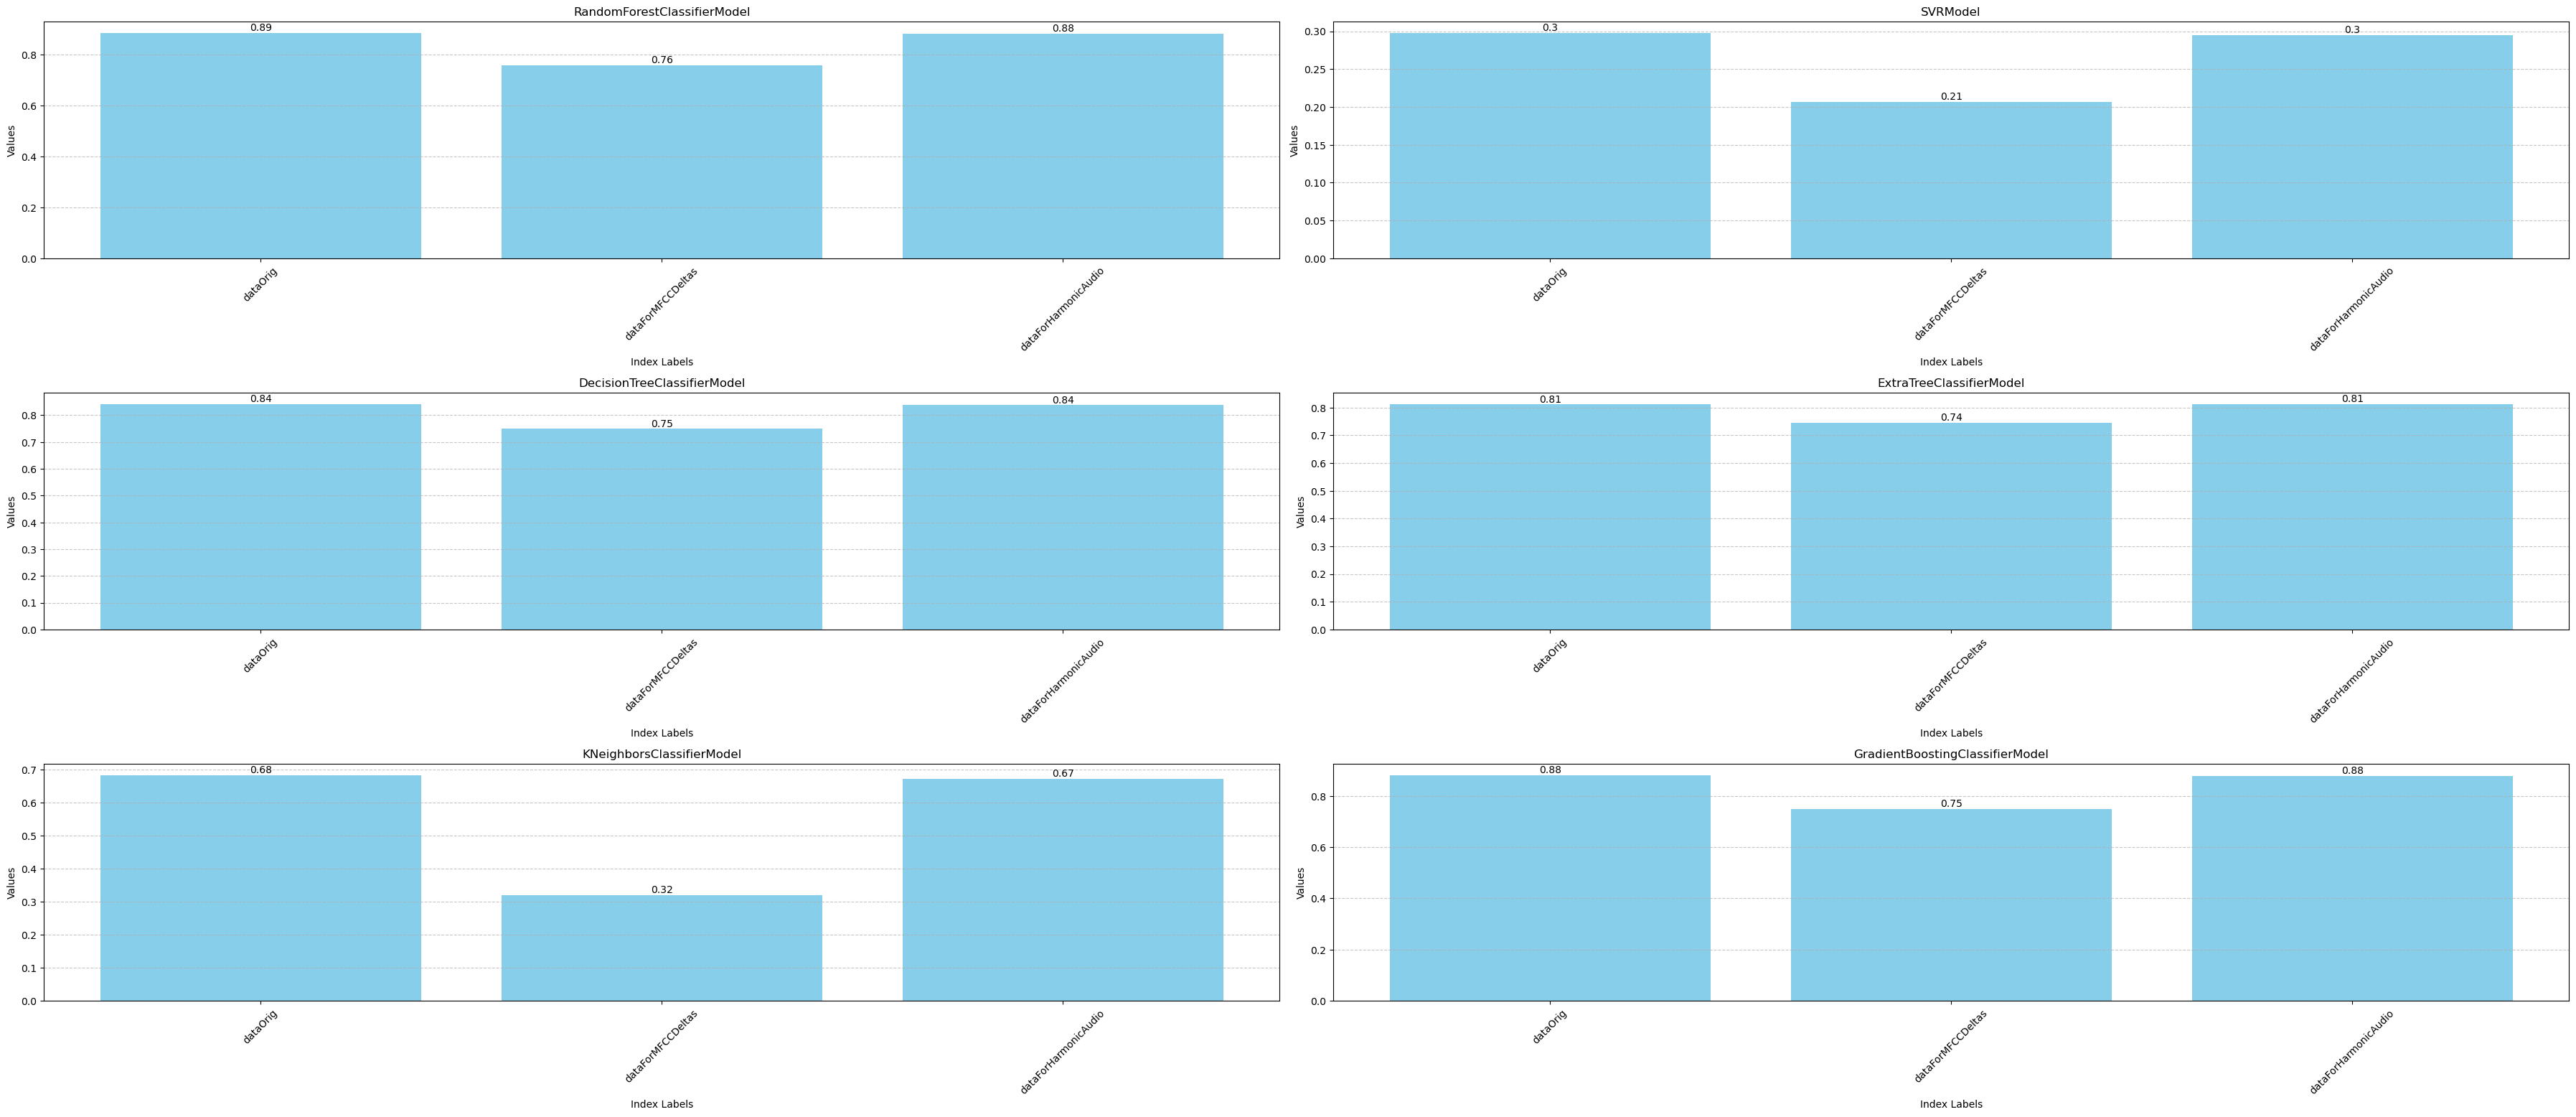

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(36, 40))
for i, col in enumerate(df_categorical_models_only.columns, start=1):
    plt.subplot(8, 2, i)
    bars = plt.bar(df_categorical_models_only.index, df_categorical_models_only[col], color='skyblue')
    plt.title(col)
    plt.xlabel('Index Labels')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')


plt.subplots_adjust(wspace=0.4, hspace=0.2)

plt.tight_layout()
plt.show()